## import libreries 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv("D:\DataSets\diabetes_prediction_dataset.csv")

In [3]:
df.sample(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99727,Female,51.0,0,0,never,26.36,5.8,200,0
59556,Female,47.0,0,0,former,28.16,6.6,155,0
72356,Male,51.0,0,0,current,32.70,5.8,140,0
362,Female,67.0,0,0,current,26.07,4.5,145,0
55415,Female,5.0,0,0,No Info,27.32,4.8,200,0
87749,Female,51.0,0,0,No Info,19.20,3.5,200,0
72825,Female,33.0,0,0,not current,20.74,6.6,85,0
87074,Female,50.0,0,0,current,31.55,5.7,160,0
24919,Male,13.0,0,0,No Info,31.12,6.0,130,0
81515,Female,22.0,0,0,No Info,26.98,5.0,145,0


In [4]:
df.shape

(100000, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [6]:
# Check the Unique values

In [7]:
df['diabetes'].value_counts()

0    91500
1     8500
Name: diabetes, dtype: int64

# This Dataset is an imbalanced 

## Data Preprocessing

In [8]:
# Convert 'age' column to integers
df['age'] = df['age'].astype(int)

In [9]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80,0,1,never,25.19,6.6,140,0
1,Female,54,0,0,No Info,27.32,6.6,80,0
2,Male,28,0,0,never,27.32,5.7,158,0
3,Female,36,0,0,current,23.45,5.0,155,0
4,Male,76,1,1,current,20.14,4.8,155,0


In [10]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [11]:
df['gender'].value_counts()

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64

In [12]:
# Replace values in the 'gender' column
df['gender'] = df['gender'].replace({'Other': 'Female'})

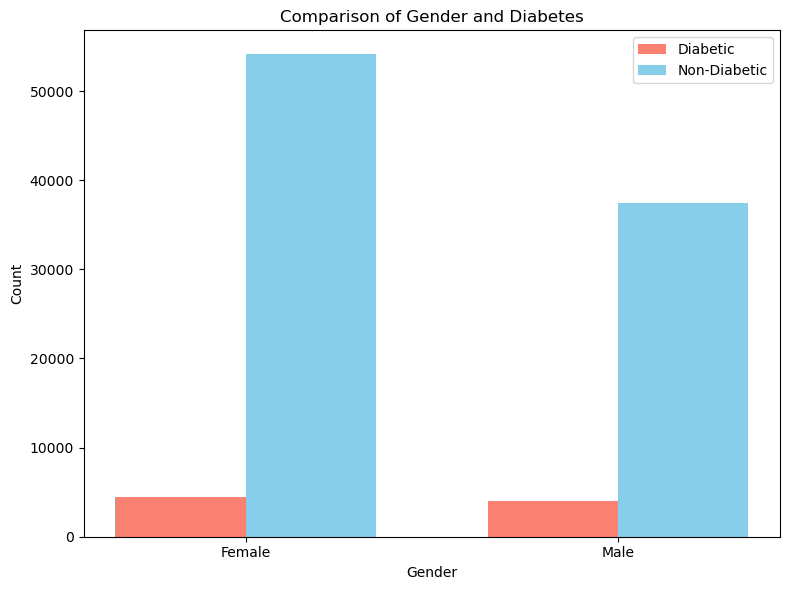

In [13]:
# Count the occurrences of each combination of 'gender' and 'diabetes'
gender_diabetes_counts = df.groupby(['gender', 'diabetes']).size().unstack(fill_value=0)

# Create a grouped bar chart
fig, ax = plt.subplots(figsize=(8, 6))

width = 0.35  # Width of each bar
x = np.arange(len(gender_diabetes_counts.index))  # x-axis values

# Plot bars for 'Diabetic' and 'Non-Diabetic' for each 'Gender'
bar1 = ax.bar(x - width/2, gender_diabetes_counts[1], width, label='Diabetic', color='salmon')
bar2 = ax.bar(x + width/2, gender_diabetes_counts[0], width, label='Non-Diabetic', color='skyblue')

# Set labels, title, and legend
ax.set_xlabel('Gender')
ax.set_ylabel('Count')
ax.set_title('Comparison of Gender and Diabetes')
ax.set_xticks(x)
ax.set_xticklabels(gender_diabetes_counts.index)
ax.legend()

plt.tight_layout()
plt.show()

In [14]:
df['smoking_history'].value_counts()

No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64

In [15]:
# Replace values in the 'smoking_history' column
df['smoking_history'] = df['smoking_history'].replace({'No Info': 'never'})

In [16]:
df['smoking_history'].value_counts()

never          70911
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64

In [17]:
df['smoking_history'] = df['smoking_history'].replace({'never' : 'No', })

In [18]:
# Separate Features and Target

In [19]:
X = df.drop('diabetes',axis = 1)
y = df['diabetes']

In [74]:
X.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,Female,80,0,1,No,25.19,6.6,140
1,Female,54,0,0,No,27.32,6.6,80
2,Male,28,0,0,No,27.32,5.7,158
3,Female,36,0,0,current,23.45,5.0,155
4,Male,76,1,1,current,20.14,4.8,155


In [20]:
y.value_counts()

0    91500
1     8500
Name: diabetes, dtype: int64

## Handled imbalanced data 

### 1. Random Over Sampling 

In [21]:
from imblearn.over_sampling import RandomOverSampler

In [22]:
ros = RandomOverSampler(random_state=42)  # You can set a random seed for reproducibility
X_resampled, y_resampled = ros.fit_resample(X, y)


In [23]:
y_resampled.value_counts()

0    91500
1    91500
Name: diabetes, dtype: int64

In [24]:
y_resampled.shape

(183000,)

### 2. SMOTE

In [25]:
# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df.select_dtypes(exclude=['number']).columns.tolist()

#### One-Hot Encoding (for both 'gender' and 'smoking_history')

In [75]:
df = pd.get_dummies(df, columns=['gender', 'smoking_history'], drop_first=True)

In [76]:
data.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_not current
0,80,0,1,25.19,6.6,140,0,0,0,0,0,0
1,54,0,0,27.32,6.6,80,0,0,0,0,0,0
2,28,0,0,27.32,5.7,158,0,1,0,0,0,0
3,36,0,0,23.45,5.0,155,0,0,1,0,0,0
4,76,1,1,20.14,4.8,155,0,1,1,0,0,0


In [27]:
smoking_history_mapping = {'never': 0, 'current': 1, 'No Info': 2}
df['smoking_history'] = df['smoking_history'].map(smoking_history_mapping)

In [66]:
data.sample(10)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_not current
34227,40,0,0,22.88,5.7,145,0,0,0,0,0,0
87131,62,1,0,38.02,6.8,159,1,0,0,0,0,0
28187,9,0,0,27.32,5.8,145,0,1,0,0,0,0
14866,69,0,0,43.24,5.8,300,1,1,0,0,0,0
66444,76,1,0,30.82,6.5,159,1,0,0,0,0,0
5206,31,0,0,27.32,4.8,145,0,1,1,0,0,0
94255,3,0,0,16.45,6.2,200,0,1,0,0,0,0
97862,53,0,1,27.94,6.0,158,0,1,0,0,0,0
60009,27,0,0,27.32,6.6,160,0,1,0,0,0,0
72494,20,0,0,27.32,6.1,160,0,0,1,0,0,0


In [29]:
X_data = data.drop('diabetes',axis = 1)
y_data =data['diabetes']

In [30]:
from imblearn.over_sampling import SMOTE

In [31]:
smote = SMOTE(random_state=42)  
X_data_resampled, y_data_resampled = smote.fit_resample(X_data, y_data)

In [64]:
X_data_resampled.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Male,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_not current
0,80,0,1,25.19,6.6,140,0,0,0,0,0
1,54,0,0,27.32,6.6,80,0,0,0,0,0
2,28,0,0,27.32,5.7,158,1,0,0,0,0
3,36,0,0,23.45,5.0,155,0,1,0,0,0
4,76,1,1,20.14,4.8,155,1,1,0,0,0


In [32]:
y_data_resampled.shape

(183000,)

### Spliting the dataset on train and test 

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_data_resampled, y_data_resampled, test_size=0.2, random_state=42)

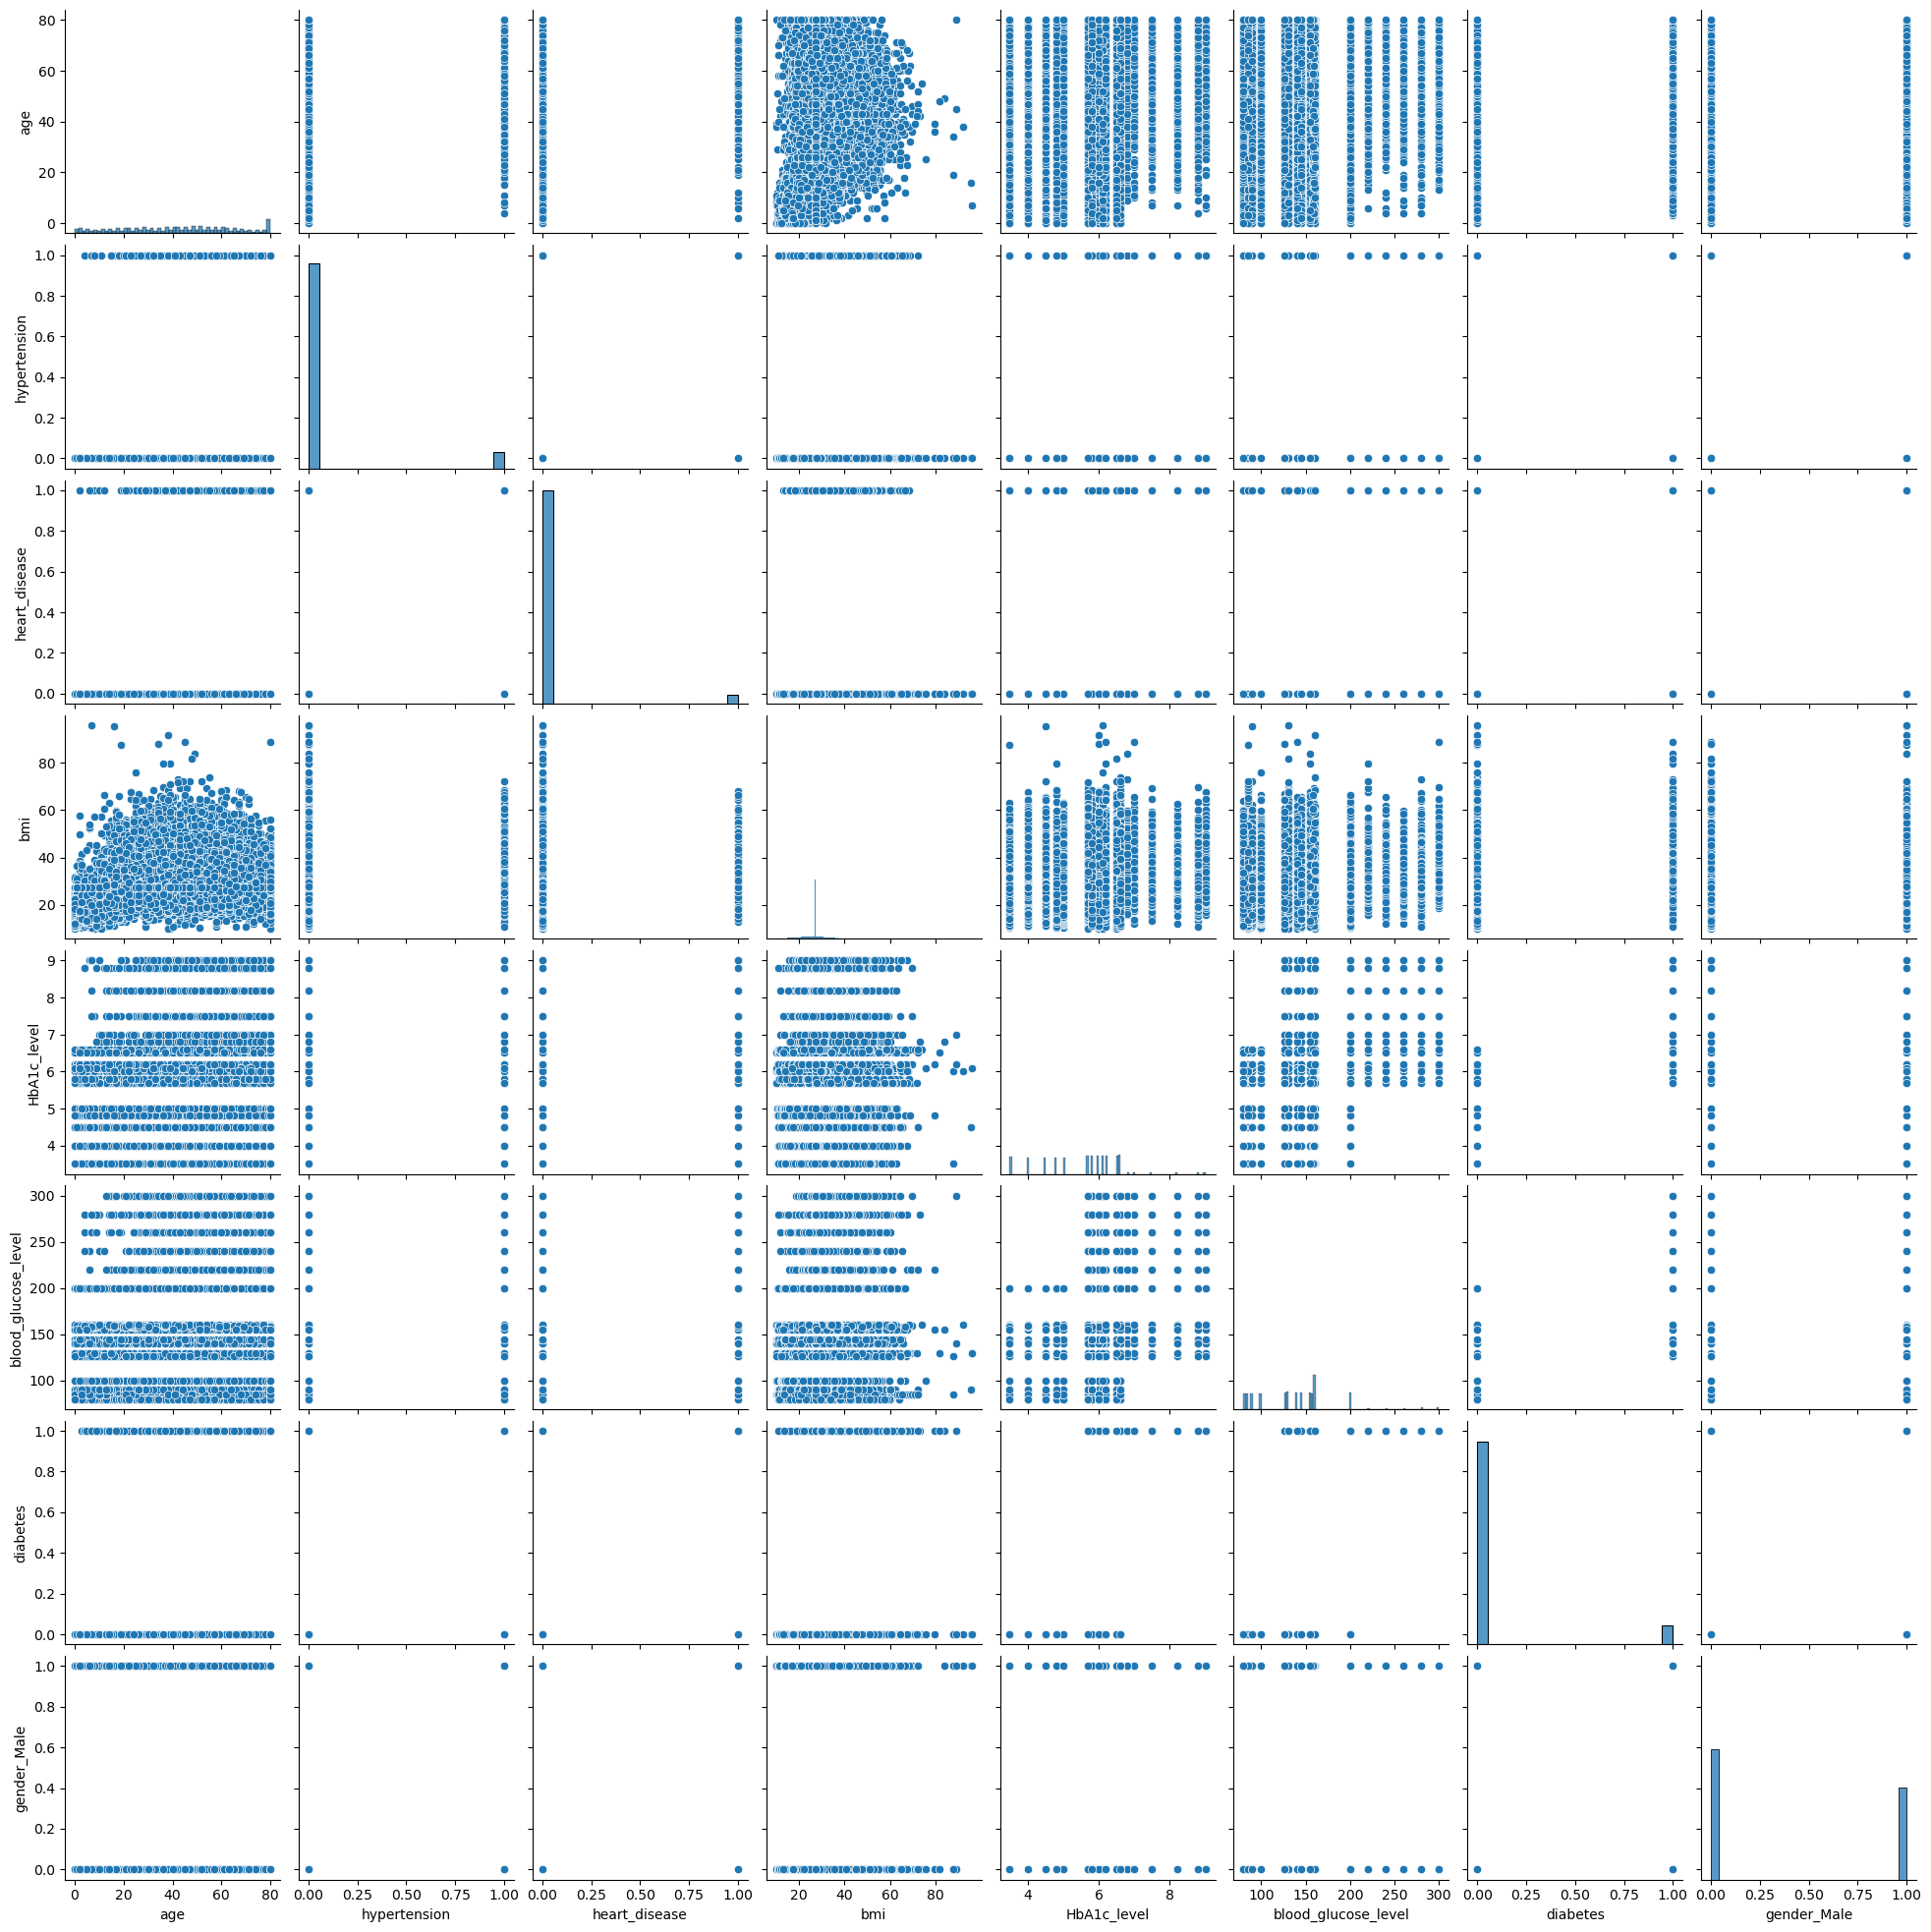

In [77]:
sns.pairplot(df)

### 1.logistic regression model

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [36]:
model = LogisticRegression(random_state = 42)

In [37]:
model = model.fit(X_train,y_train)

C:\Users\ssart\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
y_pred = model.predict(X_test)

In [39]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

In [40]:
# Print the results
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report_result)

Accuracy: 0.889344262295082
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.89     18293
           1       0.89      0.89      0.89     18307

    accuracy                           0.89     36600
   macro avg       0.89      0.89      0.89     36600
weighted avg       0.89      0.89      0.89     36600



### 2. Decision Tree Classifier 

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [43]:
# Define the parameter grid to search over
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [44]:
# Create a DecisionTreeClassifier instance
clf = DecisionTreeClassifier(random_state=42)

In [46]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [47]:
# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

In [48]:
# Fit the best estimator on the training data
best_estimator.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=2, random_state=42)

In [49]:
# Make predictions on the test data
y_pred = best_estimator.predict(X_test)

In [51]:
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)
print(f"Best Parameters: {best_params}")
print(f"Accuracy: {accuracy:.2f}")
print('Classification Report:')
print(classification_report_result)

Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     18293
           1       0.98      0.97      0.97     18307

    accuracy                           0.97     36600
   macro avg       0.97      0.97      0.97     36600
weighted avg       0.97      0.97      0.97     36600



## The model for predictions

In [72]:
input_data=(62,1,0,38.02,6.8,159,0,0,0,0,0)

# changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshaped the np array as we are prediction for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction =  best_estimator.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
    print('The Person does not have a Diabetes')
else:
    print('The Person has Diabetes') 

[1]
The Person has Diabetes


C:\Users\ssart\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [78]:
import joblib

# Download the trained Logistic Regression model
joblib.dump(best_estimator, 'trained_model.joblib')

['trained_model.joblib']